# Description
Use the Simple Moving Average Crossover (and Python) to get buy and sell signals

In [59]:
# Importing libraries
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import tabulate

In [60]:
# Define the ticker symbol (stock type)
ticker_symbol = "IBM"

# Create the ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data
start = "2016-01-01"
end="2016-06-01"
historical_data = ticker.history(start=start,end=end)
print("Historical Data:")
print(historical_data)

# Defining the df to prevent overwriting original data
df = historical_data

Historical Data:
                                Open       High        Low      Close  \
Date                                                                    
2016-01-04 00:00:00-05:00  85.250728  85.483345  84.395709  85.470772   
2016-01-05 00:00:00-05:00  85.980031  86.061761  84.779227  85.407921   
2016-01-06 00:00:00-05:00  84.483731  85.238155  84.005925  84.980392   
2016-01-07 00:00:00-05:00  84.056226  84.886099  83.257786  83.528122   
2016-01-08 00:00:00-05:00  83.729295  84.131658  82.559924  82.754822   
...                              ...        ...        ...        ...   
2016-05-24 00:00:00-04:00  94.185897  95.385025  94.185897  95.102875   
2016-05-25 00:00:00-04:00  95.500437  97.526773  95.224704  97.270271   
2016-05-26 00:00:00-04:00  97.180514  97.796100  96.859891  97.751221   
2016-05-27 00:00:00-04:00  97.693501  98.065419  97.565250  98.007706   
2016-05-31 00:00:00-04:00  97.828129  98.629680  97.642165  98.584801   

                            Volum

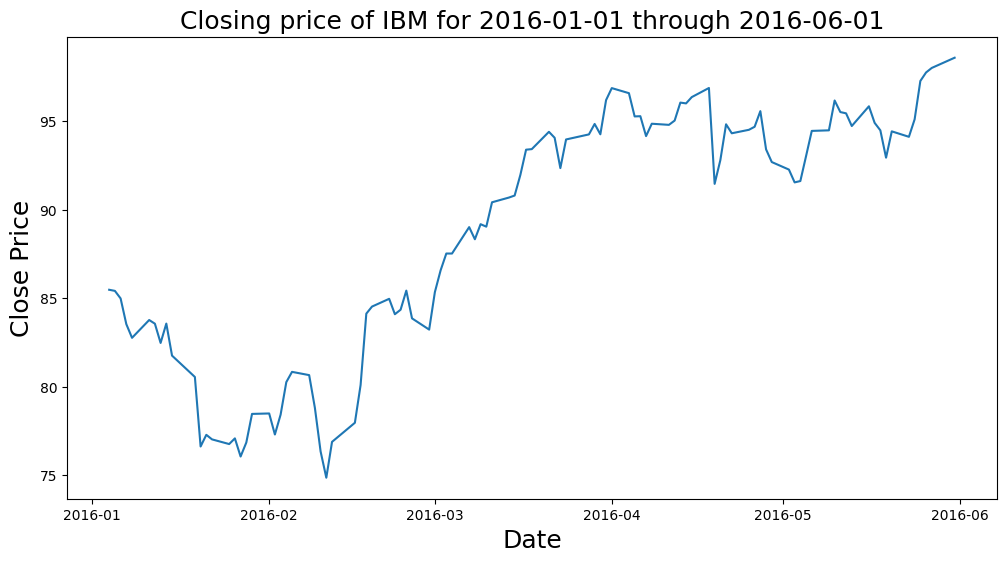

In [61]:
# Visually show the close price
plt.figure(figsize=(12,6))
plt.title(f"Closing price of {ticker_symbol} for {start} through {end}", fontsize=18)
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18)
plt.show()

In [62]:
# Create a function to calculate the Simple Moving Average (SMA)
def SMA(data, period=20, column="Close"):
    return data[column].rolling(window=period).mean()

# Creating some new columns for more data
def GenerateSMAPair(data,short,long):
    data[f"SMA{short}"] = SMA(data,period=short)
    data[f"SMA{long}"] = SMA(data,period=long)

    data[f"Signal {short}/{long}"] = np.where(data[f"SMA{short}"] > data[f"SMA{long}"], 1, 0)
    data[f"Position {short}/{long}"] = data[f"Signal {short}/{long}"].diff()
    data[f"Buy {short}/{long}"] = np.where(data[f"Position {short}/{long}"] == 1, data["Close"], np.nan)
    data[f"Sell {short}/{long}"] = np.where(data[f"Position {short}/{long}"] == -1, data["Close"], np.nan)

In [63]:
#Create two new columns to store the 20 and 50 day SMA
GenerateSMAPair(df,20,50)

In [64]:
# Get the buy and sell signals
df["Signal 20/50"] = np.where(df["SMA20"] > df["SMA50"], 1, 0)
df["Position 20/50"] = df["Signal 20/50"].diff()
df["Buy 20/50"] = np.where(df["Position 20/50"] == 1, df["Close"], np.nan)
df["Sell 20/50"] = np.where(df["Position 20/50"] == -1, df["Close"], np.nan)

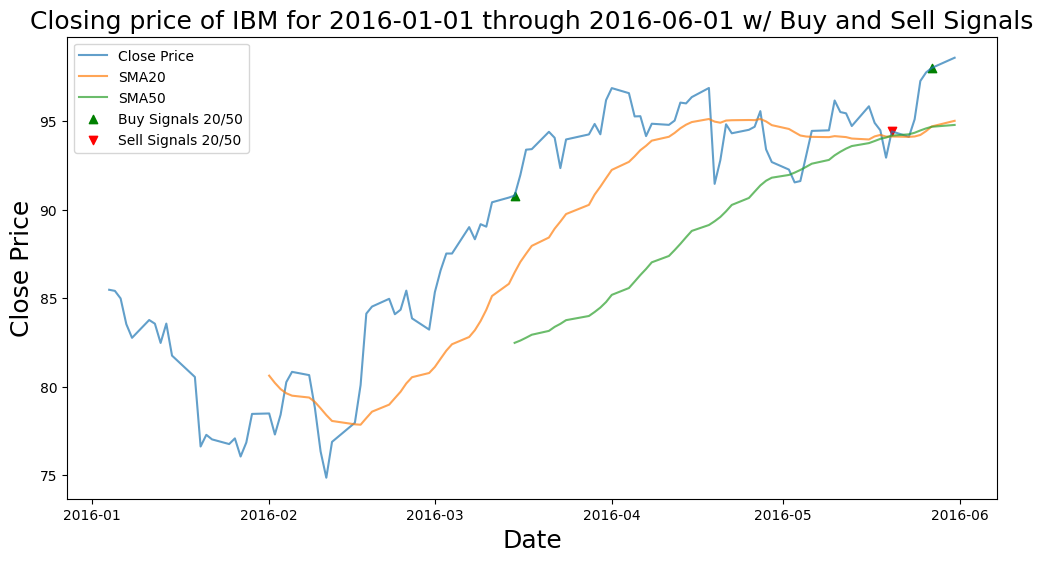

In [65]:
# Show the close price with SMAs and Buy/Sell signals
plt.figure(figsize=(12,6))
plt.title(f"Closing price of {ticker_symbol} for {start} through {end} w/ Buy and Sell Signals", fontsize=18)
plt.plot(df["Close"],alpha=0.7,label="Close Price")
plt.plot(df["SMA20"],alpha=0.7,label="SMA20")
plt.plot(df["SMA50"],alpha=0.7,label="SMA50")
plt.scatter(df.index, df["Buy 20/50"],alpha=1,label="Buy Signals 20/50",marker="^",color="green")
plt.scatter(df.index, df["Sell 20/50"],alpha=1,label="Sell Signals 20/50",marker="v",color="red")

plt.legend()
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18)
#plt.savefig(f"imgs/{ticker_symbol}_{start}_{end}")
plt.show()

In [66]:
# Defining the daily returns
df["Daily Returns"] = df["Close"].pct_change()

# Display the daily returns
print(df["Daily Returns"])

# Cumulative return
df["Cumulative Returns"] = (1+df["Daily Returns"]).cumprod()
print(df["Cumulative Returns"])

Date
2016-01-04 00:00:00-05:00         NaN
2016-01-05 00:00:00-05:00   -0.000735
2016-01-06 00:00:00-05:00   -0.005006
2016-01-07 00:00:00-05:00   -0.017089
2016-01-08 00:00:00-05:00   -0.009258
                               ...   
2016-05-24 00:00:00-04:00    0.010493
2016-05-25 00:00:00-04:00    0.022790
2016-05-26 00:00:00-04:00    0.004944
2016-05-27 00:00:00-04:00    0.002624
2016-05-31 00:00:00-04:00    0.005888
Name: Daily Returns, Length: 103, dtype: float64
Date
2016-01-04 00:00:00-05:00         NaN
2016-01-05 00:00:00-05:00    0.999265
2016-01-06 00:00:00-05:00    0.994263
2016-01-07 00:00:00-05:00    0.977271
2016-01-08 00:00:00-05:00    0.968224
                               ...   
2016-05-24 00:00:00-04:00    1.112695
2016-05-25 00:00:00-04:00    1.138053
2016-05-26 00:00:00-04:00    1.143680
2016-05-27 00:00:00-04:00    1.146681
2016-05-31 00:00:00-04:00    1.153433
Name: Cumulative Returns, Length: 103, dtype: float64


In [67]:
# Generate some more SMA pairs to test
GenerateSMAPair(df,10,30)
GenerateSMAPair(df,50,100)

# Strategy Returns
df["Strategy Returns 10/30"] = df["Daily Returns"] * df["Signal 10/30"]
df["Cumulative Returns 10/30"] = (1+df["Strategy Returns 10/30"]).cumprod()

df["Strategy Returns 20/50"] = df["Daily Returns"] * df["Signal 20/50"]
df["Cumulative Returns 20/50"] = (1+df["Strategy Returns 20/50"]).cumprod()

df["Strategy Returns 50/100"] = df["Daily Returns"] * df["Signal 50/100"]
df["Cumulative Returns 50/100"] = (1+df["Strategy Returns 50/100"]).cumprod()

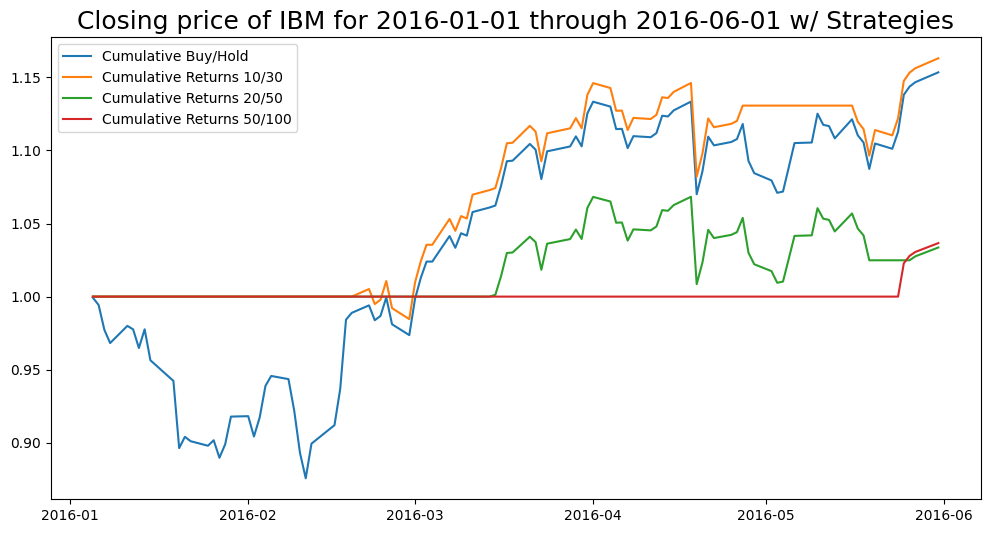

Comparison:
Buy/Hold : 1.153%
10/30 : 1.163%
20/50 : 1.034%
50/100 : 1.037%


In [68]:
# Plotting the strategy performance
plt.figure(figsize=(12,6))
plt.title(f"Closing price of {ticker_symbol} for {start} through {end} w/ Strategies",fontsize=18)
plt.plot(df["Cumulative Returns"],label="Cumulative Buy/Hold")
plt.plot(df["Cumulative Returns 10/30"],label="Cumulative Returns 10/30")
plt.plot(df["Cumulative Returns 20/50"],label="Cumulative Returns 20/50")
plt.plot(df["Cumulative Returns 50/100"],label="Cumulative Returns 50/100")
plt.legend()
plt.savefig(f"imgs/EquityCurve {ticker_symbol}_{start}_{end}")
plt.show()

# Numerical output
print("Comparison:")
print(f"Buy/Hold : {df["Cumulative Returns"].iloc[-1]:.3f}%")
print(f"10/30 : {df["Cumulative Returns 10/30"].iloc[-1]:.3f}%")
print(f"20/50 : {df["Cumulative Returns 20/50"].iloc[-1]:.3f}%")
print(f"50/100 : {df["Cumulative Returns 50/100"].iloc[-1]:.3f}%")

In [69]:
# Volatility of returns, sqrt(252) accounts for ~252 trading days a year
volatility = df["Daily Returns"].std() * np.sqrt(252)
volatility_10_30 = df["Strategy Returns 10/30"].std() * np.sqrt(252)
volatility_20_50 = df["Strategy Returns 20/50"].std() * np.sqrt(252)
volatility_50_100 = df["Strategy Returns 50/100"].std() * np.sqrt(252)

print("Comparing the volatility:")
print(f"Buy/Hold : {volatility:.3f}")
print(f"10/30 : {volatility_10_30:.3f}")
print(f"20/50 : {volatility_20_50:.3f}")
print(f"50/100 : {volatility_50_100:.3f}")

Comparing the volatility:
Buy/Hold : 0.241
10/30 : 0.156
20/50 : 0.144
50/100 : 0.038


In [70]:
# Sharpe ratio calculation
sharpe = df["Daily Returns"].mean() / volatility * np.sqrt(252)
sharpe_10_30 =  df["Strategy Returns 10/30"].mean() / volatility_10_30 * np.sqrt(252)
sharpe_20_50 =  df["Strategy Returns 20/50"].mean() / volatility_20_50 * np.sqrt(252)
sharpe_50_100 =  df["Strategy Returns 50/100"].mean() / volatility_50_100 * np.sqrt(252)

print("Comparing the Sharpe ratio:")
print(f"Buy/Hold : {sharpe:.5f}")
print(f"10/30 : {sharpe_10_30:.5f}")
print(f"20/50 : {sharpe_20_50:.5f}")
print(f"50/100 : {sharpe_50_100:.5f}")

Comparing the Sharpe ratio:
Buy/Hold : 0.09964
10/30 : 0.15615
20/50 : 0.04026
50/100 : 0.14926


In [71]:
# Maximum Drawdown
def MaximumDrawdown(data,short,long):
    if short == long == 0:
        running_peak = data[f"Cumulative Returns"].cummax()
        drawdowns = (data[f"Cumulative Returns"] - running_peak) / running_peak
    else:
        running_peak = data[f"Cumulative Returns {short}/{long}"].cummax()
        drawdowns = (data[f"Cumulative Returns {short}/{long}"] - running_peak) / running_peak
    return drawdowns.min(skipna=True)

maxdrawdown = MaximumDrawdown(df,0,0)
maxdrawdown_10_30 = MaximumDrawdown(df,10,30)
maxdrawdown_20_50 = MaximumDrawdown(df,20,50)
maxdrawdown_50_100 = MaximumDrawdown(df,50,100)

print("Comparing the Maximum Drawdown:")
print(f"Buy/Hold : {maxdrawdown:.5f}")
print(f"10/30 : {maxdrawdown_10_30:.5f}")
print(f"20/50 : {maxdrawdown_20_50:.5f}")
print(f"50/100 : {maxdrawdown_50_100:.5f}")

Comparing the Maximum Drawdown:
Buy/Hold : -0.12364
10/30 : -0.05592
20/50 : -0.05592
50/100 : 0.00000


In [ ]:
# Final Comparison Dataframe
data = {
    "Buy/Hold": [df["Cumulative Returns"].iloc[-1],volatility,sharpe,maxdrawdown],
    "10/30": [df["Cumulative Returns 10/30"].iloc[-1],volatility_10_30,sharpe_10_30,maxdrawdown_10_30],
    "20/50": [df["Cumulative Returns 20/50"].iloc[-1],volatility_20_50,sharpe_20_50,maxdrawdown_20_50],
    "50/100": [df["Cumulative Returns 50/100"].iloc[-1],volatility_50_100,sharpe_50_100,maxdrawdown_50_100]
}

metrics = ["Final Return","Volatility","Sharpe Ratio","Maximum Drawdown"]

df_comparison = pd.DataFrame(data, index=metrics)
df_comparison.to_markdown(f"tables/{ticker_symbol}_{start}_{end}.md")